# Project-One Progress Report - 2025-Feb-03

## Title of Research Paper
Write the title of your research paper (research question) here. If it is not finalized yet, provide the question or topic you are exploring. This can/will be updated later.


## Dataset Cleaning / Loading
Name of your main dataset and additional datasets if you are using them in this report.
What is the dataset file format? Where to get the files?


In [501]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

df = pd.read_csv('..\Data\socioeconomic_voting.csv')
df.head()

,State,County Name,FIPS,Unemployment Rate 2020,County Median Household Income (2021),Urban Influence Code 2013,County Income Percentile Within State (2021),Bachelor's Degree or Higher Percentage (2018-2022),Party,Vote Percentage
0,ALABAMA,AUTAUGA,1001,5.3,66444.0,2.0,0.955224,29.6,REPUBLICAN,71.436802
1,ALABAMA,BALDWIN,1003,6.1,65658.0,2.0,0.940299,32.6,REPUBLICAN,76.171373
2,ALABAMA,BARBOUR,1005,7.7,38649.0,6.0,0.164179,11.9,REPUBLICAN,53.451226
3,ALABAMA,BIBB,1007,7.3,48454.0,1.0,0.611940,10.9,REPUBLICAN,78.426264
4,ALABAMA,BLOUNT,1009,4.5,56894.0,1.0,0.895522,14.7,REPUBLICAN,89.571553


## Research Summary
Please provide a one-paragraph description covering the following. We want exactly one paragraph (4-5 lines). Longer responses will result in formatting penalties.

- **Research Question:** Clearly state your research question or hypothesis.
- **Data Source and Structure:** Describe the data source and structure (e.g.,firm-year level, individual-level, etc.).
- **Outcome Variable(s) and Variable(s) of Interest:** Defne your outcome variable(s) and key variables of interest.

This paragraph ensures clarity and consistency. Use the same description in futurereports if unchanged.



**Summary Statistics**

In [502]:
df = pd.read_csv('..\Data\socioeconomic_voting.csv')
columns = ["County Median Household Income (2021)", "Unemployment Rate 2020", "Bachelor's Degree or Higher Percentage (2018-2022)", "Urban Influence Code 2013"]
df[columns].describe()

,County Median Household Income (2021),Unemployment Rate 2020,Bachelor's Degree or Higher Percentage (2018-2022),Urban Influence Code 2013
count,3115.000000,3115.000000,3115.000000,3115.000000
mean,58852.584912,6.729727,23.492970,5.227287
std,15249.035244,2.271373,10.072071,3.475443
min,25653.000000,1.600000,0.000000,1.000000
25%,48972.000000,5.200000,16.500000,2.000000
50%,56567.000000,6.600000,20.900000,5.000000
75%,65536.500000,8.000000,27.900000,8.000000
max,153716.000000,22.600000,78.900000,12.000000


In [503]:
print("Median:")
df[columns].median()

Median:


County Median Household Income (2021)                 56567.0
Unemployment Rate 2020                                    6.6
Bachelor's Degree or Higher Percentage (2018-2022)       20.9
Urban Influence Code 2013                                 5.0
dtype: float64

In [504]:
print("Median:")
df[columns].mode()

Median:


,County Median Household Income (2021),Unemployment Rate 2020,Bachelor's Degree or Higher Percentage (2018-2022),Urban Influence Code 2013
0,66697.0,5.4,18.3,2.0
1,NaN,6.3,NaN,NaN


## Four Visualization
For this section, just give us **4** plots back to back.

**Dataset Information**

Create four different visualizations using your variables.

1. Use bar plots, histograms, line plots, etc. (no maps).
2. Ensure each plot has a clear and descriptive title.
3. Visualizations must be relevant to your research question.


**Graph-1: No. of Counties Won against Party in President Election**


[Text(0, 0, '1410'), Text(0, 0, '3219'), Text(0, 0, '4')]

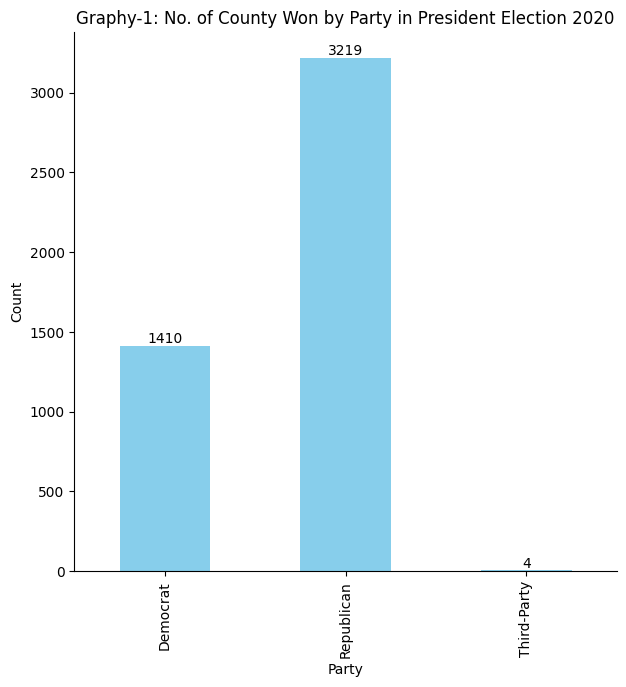

In [505]:
#Graph-1: No. of Counties Won against Party in President Election

president_county_cand = pd.read_csv('..\Data\president_county_candidate.csv')
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# Get all Won records
result = president_county_cand[(president_county_cand['won'] == True)]

# Calculate value counts
counts = result['party'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
counts.sort_index().plot(kind='bar', color='skyblue')

# Plot barchart
ax.set_xlabel('Party')
ax.set_ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graphy-1: No. of County Won by Party in President Election 2020")
ax.bar_label(ax.containers[0])



In [547]:
president_county_cand = pd.read_csv('..\Data\president_county_candidate.csv')
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# combine towns into county for some states
def combine_by_county_list(ddf: pd.DataFrame, state: str, county: str, county_list: list) -> pd.DataFrame:

    # select all target rows
    #print("Filtered_df:")
    filtered_df = ddf[ddf['county'].isin(county_list) & (ddf['state'] == state_name)]
    #print(filtered_df)

    # combined the selected rows
    combined_df = filtered_df.groupby(['state', 'candidate', 'party', 'won']).agg(
    total_votes=('total_votes', 'sum')).reset_index()

    # add col 'county' to combined_df
    combined_df['county'] = county
    #print(combined_df)
    
    # remove the matched counties rows
    updated_df = ddf[ ~ddf['county'].isin(county_list) & (ddf['state'] != state_name)]
    #print(updated_df)

    # add new row
    updated_df = pd.concat([updated_df, combined_df], ignore_index=True)
    
    return updated_df


# data cleaning
# president county candidate
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")

president_county_cand = president_county_cand.loc[president_county_cand['won'] == True]
#print(president_county_cand.count())

# consolidate multiple towns to one county record for 'DISTRICT OF COLUMBIA'
state_name = 'DISTRICT OF COLUMBIA'
county_name = 'DISTRICT OF COLUMBIA'
county_match_list = ['DISTRICT OF COLUMBIA', 'WARD 2', 'WARD 3', 'WARD 4', 'WARD 5', 'WARD 6', 'WARD 7', 'WARD 8']

pcc_df = combine_by_county_list(president_county_cand, state_name, county_name, county_match_list)
#print(pcc_df.loc[df['state'] == state_name])
#print(pcc_df)

#state_name = 'CONNECTICUT'
#county_name = 'FAIRFIELD'
#county_match_list = ["BETHEL",	"BRIDGEPORT",	"BROOKFIELD",	"DANBURY",	"DARIEN",	"EASTON",	"FAIRFIELD",	"GREENWICH",	
#                     "MONROE",	"NEW CANAAN",	"NEW FAIRFIELD",	"NEWTOWN",	"NORWALK",	"REDDING",	"RIDGEFIELD",	"SHELTON",	
#                     "SHERMAN",	"STAMFORD",	"STRATFORD",	"TRUMBULL",	"WESTON",	"WESTPORT",	"WILTON",]
#ccc = combine_by_county_list(pcc_df, state_name, county_name, county_match_list)
#print(pcc_df.loc[df['state'] == state_name])
#print(ccc)



# socioeconomic voting
soc_econ_voting = pd.read_csv('..\Data\socioeconomic_voting.csv')
# data cleaning
sev_df = soc_econ_voting.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
sev_df['state'] = sev_df['state'].str.upper()
sev_df['state'] = sev_df['state'].str.strip()
# col 'County Name'
sev_df['county'] = sev_df['county'].str.upper()
sev_df['county'] = sev_df['county'].str.strip()
sev_df['county'] = sev_df['county'].str.replace(" COUNTY", "")
#print(sev_df.count())
#sev_df



final_df = pd.merge(pcc_df, sev_df, on=['state', 'county'], how="inner")
print(final_df.count())
     



state          4633
county         4633
candidate      4633
party          4633
total_votes    4633
won            4633
dtype: int64
state                                                 3115
county                                                3115
FIPS                                                  3115
Unemployment Rate 2020                                3115
County Median Household Income (2021)                 3115
Urban Influence Code 2013                             3115
County Income Percentile Within State (2021)          3115
Bachelor's Degree or Higher Percentage (2018-2022)    3115
Party                                                 3115
Vote Percentage                                       3115
dtype: int64
state                                                 3023
county                                                3023
candidate                                             3023
party                                                 3023
total_votes                 

**Graph-2: Percentage of votes won within county vs Median Income**

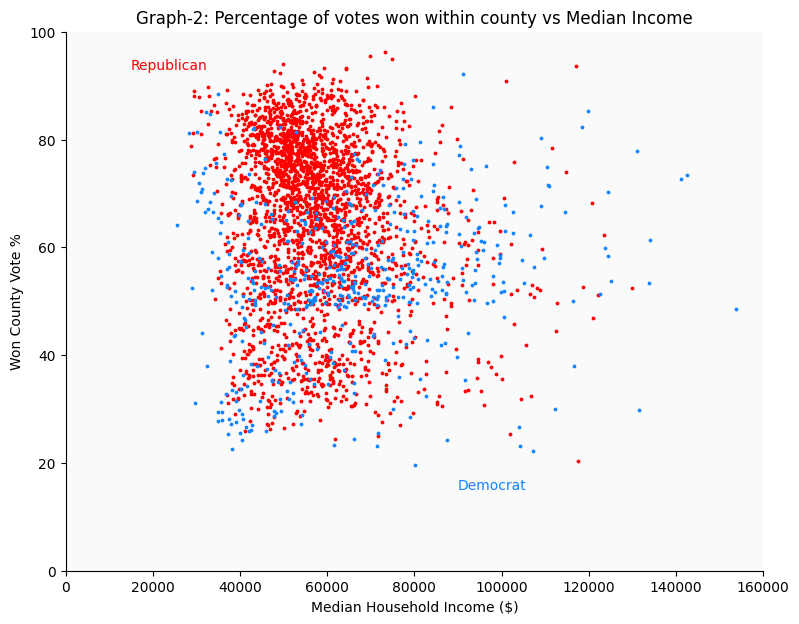

In [518]:
# Graph-2: Percentage of votes won within county vs Median Income
fig, ax = plt.subplots(figsize=(9, 7))

# select columns to be ploted
data_df = final_df[['County Median Household Income (2021)', 'Vote Percentage', 'party']]

# group Household Income in range (Not using below at the moment)
#income_bins = np.arange(20000, 180000, 2000)
#data_df['IncomeGroup'] = pd.cut(data_df['County Median Household Income (2021)'], bins=income_bins)
#print(data_df)
#g2_df = data_df.groupby('IncomeGroup').agg(
#                Count=('Vote Percentage', 'size'),
#                Averge_Vote_Percentage=('Vote Percentage', 'mean')
#                ).reset_index()
#g2_df['IncomeGroup_Mid'] = g2_df['IncomeGroup'].apply(lambda x: x.mid)
#print(g2_df)

bgcolor = (250/255, 250/255, 250/255)


# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}
#data_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['party'], s=3)

rep_df = data_df[data_df['party']=='Republican']
rep_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['Republican'], s=3)
dem_df = data_df[data_df['party']=='Democrat']
dem_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['Democrat'], s=3)
other_df = data_df[data_df['party']=='Third-Party']
other_df.plot.scatter(x="County Median Household Income (2021)", y="Vote Percentage", ax=ax, color=colors['Third-Party'], s=3)

# set title and labels
ax.set_xlabel('Median Household Income ($)')
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-2: Percentage of votes won within county vs Median Income")
ax.set_facecolor(bgcolor)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 100)
ax.set_xlim((0, 160000))

ax.annotate("Democrat", (90000, 15), color=colors["Democrat"])
ax.annotate("Republican", (15000, 93), color=colors["Republican"]);
ax.set_zorder(1)

**Graph-3: Percentage of votes won within county vs Median Income**

Text(0.5, 1.0, 'Democrat')

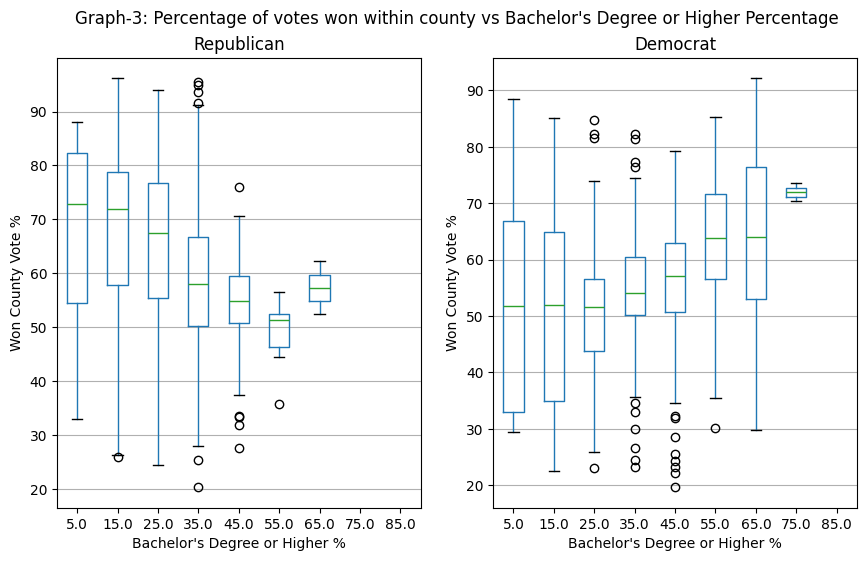

In [509]:
# Graph-3: Percentage of votes won within county vs Median Income

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# select columns to be ploted
data_df = final_df[["Bachelor's Degree or Higher Percentage (2018-2022)", "Vote Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Bachelor's Degree or Higher Percentage (2018-2022)"], bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote Percentage'], ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote Percentage'], ax=ax[1], grid = False) 


fig.suptitle("Graph-3: Percentage of votes won within county vs Bachelor's Degree or Higher Percentage")
ax[0].grid(axis='y')
ax[0].set_xlabel("Bachelor's Degree or Higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y')
ax[1].set_xlabel("Bachelor's Degree or Higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")


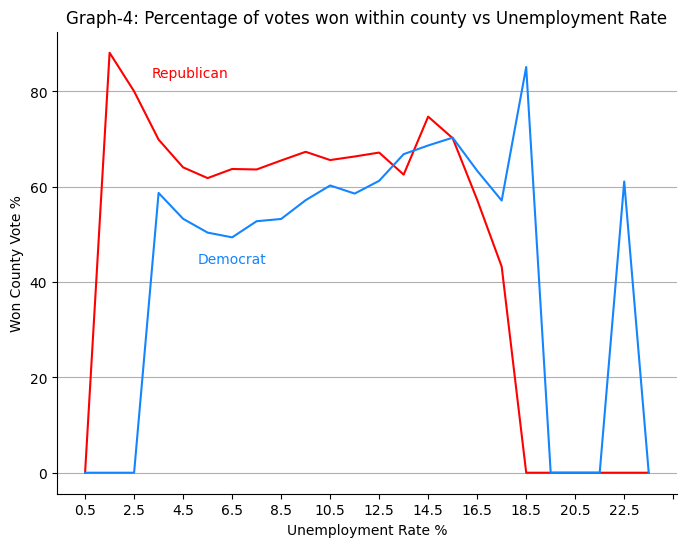

In [541]:
# Graph-4: Percentage of votes won within county vs Unemployment rate

fig, ax = plt.subplots(figsize=(8, 6))

# select columns to be ploted
data_df = final_df[["Unemployment Rate 2020", "Vote Percentage", "party"]]

# group Education attainment in range
unemployment_bins = np.arange(0, 25, 1)
x_ticks = np.arange(0, 25, 2)

# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}

g2_df = data_df.copy()
g2_df['UnemploymentRateGroup'] = pd.cut(data_df["Unemployment Rate 2020"], bins=unemployment_bins)

# create count of Vote Percentage and Average of Vote Percentage
g2_df = g2_df.groupby(['UnemploymentRateGroup', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote Percentage', 'mean')
                ).reset_index()
g2_df['UnemploymentRateGroupMid'] = g2_df['UnemploymentRateGroup'].apply(lambda x: x.mid)
g2_df.set_index('UnemploymentRateGroupMid', inplace=True)

rep_df = g2_df[g2_df['party']=='Republican']
rep_df = rep_df['Averge_Vote_Percentage'].fillna(0)
rep_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, color=colors["Republican"], xticks=x_ticks)

dem_df = g2_df[g2_df['party']=='Democrat']
dem_df = dem_df['Averge_Vote_Percentage'].fillna(0)
dem_df.plot(y='Averge_Vote_Percentage' , ax=ax, legend=False, color=colors["Democrat"], xticks=x_ticks)

#other_df = g2_df[g2_df['party']=='Third-Party']
#other_df = other_df['Averge_Vote_Percentage'].fillna(0)
#other_df.plot(y='Averge_Vote_Percentage' , ax=ax, legend=False, color=colors["Third-Party"], xticks=x_ticks)


# No cut() and groupby
#dem_df = data_df[data_df['party']=='Republican']
#dem_df.set_index('Unemployment Rate 2020', inplace=True)
#dem_df.sort_index(inplace=True)
#dem_df.plot(y='Vote Percentage' , ax=ax, legend=False, color=colors["Republican"])

#rep_df = data_df[data_df['party']=='Democrat']
#rep_df.set_index('Unemployment Rate 2020', inplace=True)
#rep_df.sort_index(inplace=True)
#rep_df.plot(y='Vote Percentage' , ax=ax, legend=False, color=colors["Democrat"])

#other_df = data_df[data_df['party']=='Third-Party']
#other_df.set_index('Unemployment Rate 2020', inplace=True)
#other_df.sort_index(inplace=True)
#other_df.plot(y='Vote Percentage' , ax=ax, legend=False, color=colors["Third-Party"])

ax.grid(axis='y')
ax.set_xlabel("Unemployment Rate %")
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-4: Percentage of votes won within county vs Unemployment Rate")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_ylim(0, 100)
#ax.set_xlim((0, 160000))

ax.annotate("Democrat", (4.6, 44), color=colors["Democrat"])
ax.annotate("Republican", (2.7, 83), color=colors["Republican"]);
